# __Seaborn Visualization: Basics to Advanced__

## __Agenda__

- Introduction to Seaborn
- Plotting Graphs Using Seaborn
- Violin Plot
- Pair Plot
- Heatmap
- Joint Plot
- Swarm Plot
- Plotting 3D Graphs for Multiple Columns Using Seaborn
- Introduction to Plotly
- Plotting a Graph Using Plotly
- Scatter Plot
- Box Plot
- Scatter Matrix
- Heatmap

## __1. Introduction to Seaborn__
Seaborn is a Python library for statistical data visualization that builds on Matplotlib.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_05_Data_Visualization/2_Seaborn_Visualization_Basics_to_Advanced/Seaborn.png)
- It provides an interface for creating attractive and informative statistical graphics.
- It comes with several built-in themes and color palettes to make creating aesthetically pleasing visualizations easy.
- It is particularly well-suited for exploring complex datasets with multiple variables.



The code below leverages Seaborn's functionality to create a specialized line plot for visualizing fMRI data with distinct regions and events.
- Seaborn simplifies the process of creating complex visualizations and provides additional features for customization and exploration of data patterns.







In [1]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

An fMRI database is a repository that stores collections of functional magnetic resonance imaging (fMRI) data, which are essentially brain scans that measure changes in blood flow to indicate brain activity, allowing researchers to study how different brain regions activate during various tasks or stimuli; a prominent example of an fMRI database is "OpenfMRI", which provides publicly accessible fMRI datasets for researchers to analyze and compare across studies. 


In [7]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
fmri.head()


subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [9]:
fmri.tail()


subject  timepoint event    region    signal
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

In [3]:
sns.set_theme?


Signature:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
Docstring:
Set aspects of the visual theme for all matplotlib and seaborn plots.

This function changes the global defaults for all plots using the
matplotlib rcParams system. The themeing is decomposed into several distinct
sets of parameter values.

The options are illustrated in the :doc:`aesthetics <../tutorial/aesthetics>`
and :doc:`color palette <../tutorial/color_palettes>` tutorials.

Parameters
----------
context : string or dict
    Scaling parameters, see :func:`plotting_context`.
style : string or dict
    Axes style parameters, see :func:`axes_style`.
palette : string or sequence
    Color palette, see :func:`color_palette`.
font : string
    Font family, see matplotlib font manager.
font_scale : float, optional
    Separate scaling factor to independently scale the size of the
    font elements.
color_cod

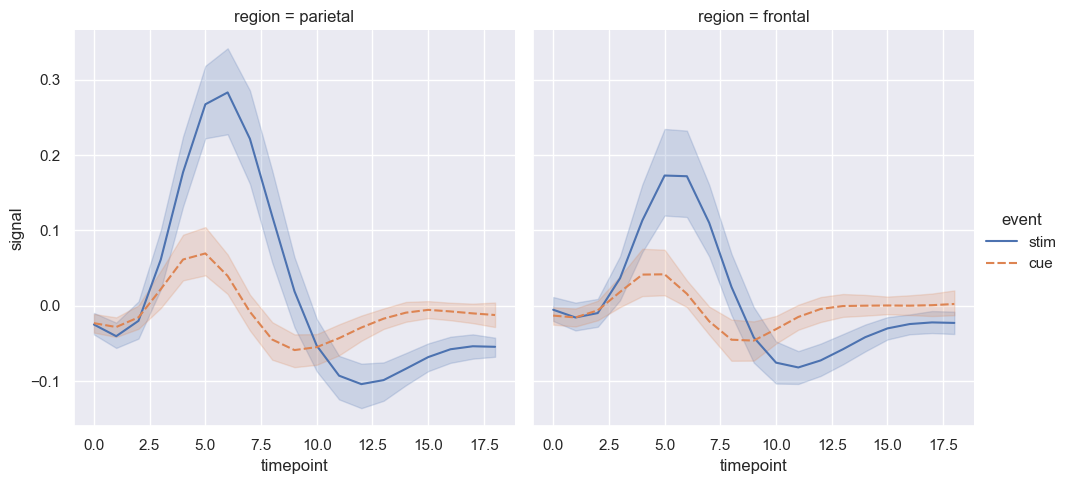

In [3]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

In [14]:
fmri.tail()

subject  timepoint event    region    signal
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

In [5]:
fmri.shape

(1064, 5)

In [16]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [18]:
fmri.shape

(1064, 5)

In [22]:
fmri.describe()

timepoint       signal
count  1064.000000  1064.000000
mean      9.000000     0.003540
std       5.479801     0.093930
min       0.000000    -0.255486
25%       4.000000    -0.046070
50%       9.000000    -0.013653
75%      14.000000     0.024293
max      18.000000     0.564985

## __2. Plotting Graphs Using Seaborn__

__Note:__ Previously, you explored these plot types with Matplotlib. Now, let's demonstrate how Seaborn achieves similar visualizations with enhanced styling and simplicity.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [12]:
tips.tail()

total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

In [20]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [28]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [30]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [5]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

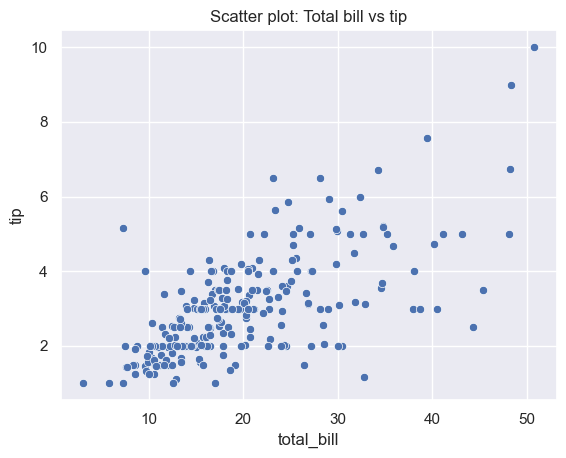

In [28]:
# Scatter Plot
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter plot: Total bill vs tip')
plt.show()

- Based on the scatter plot, you can infer a positive relationship between the total bill and tip amount, indicating that customers tend to tip more when they spend more on their meals.
- There is still variability in tip amounts for a given total bill, suggesting that factors other than the bill amount may also influence the tips customers leave.

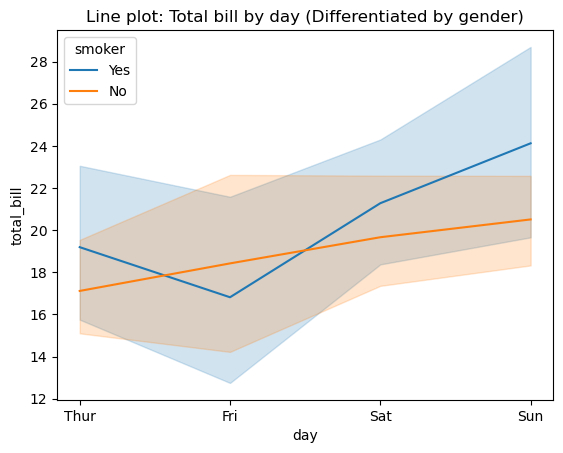

In [7]:
# Line Plot
sns.lineplot(x='day', y='total_bill', data=tips, hue='smoker')
plt.title('Line plot: Total bill by day (Differentiated by gender)')
plt.show()

- The lines on the plot represent the trend of total bill amounts across different days of the week, segmented by gender (male and female).
- Based on the line plot, you can infer that the total bill paid by males is considerably higher than that paid by females.

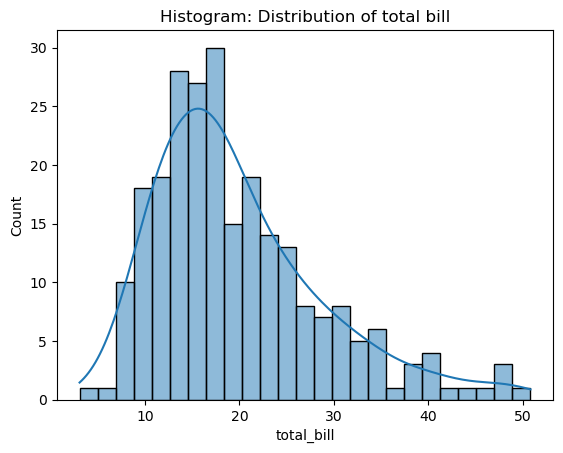

In [10]:
# Histogram
sns.histplot(tips['total_bill'], bins=25, kde=True)
plt.title('Histogram: Distribution of total bill')
plt.show()

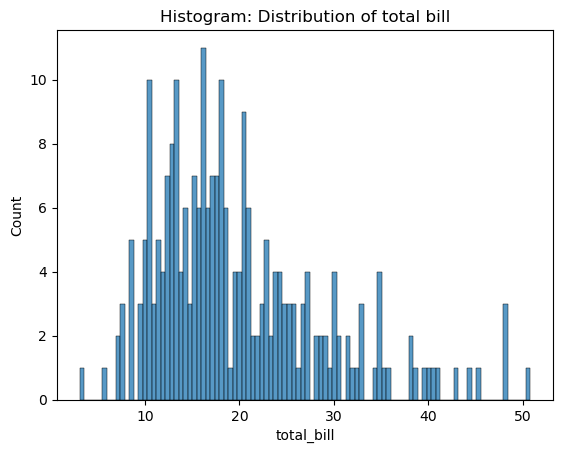

In [11]:
# Histogram
sns.histplot(tips['total_bill'], bins=100, kde=False)
plt.title('Histogram: Distribution of total bill')
plt.show()

- The histogram displays the distribution of total bill amounts across the dataset.
- Each bar on the plot represents a range or bin of total bill amounts, and the height of the bar corresponds to the frequency of occurrences within that range.
- The data is right-skewed, which means the mode, median, and mean are arranged, respectively.
- Based on the chart, you can infer that most of the total bills lie in the 10 to 20 range.

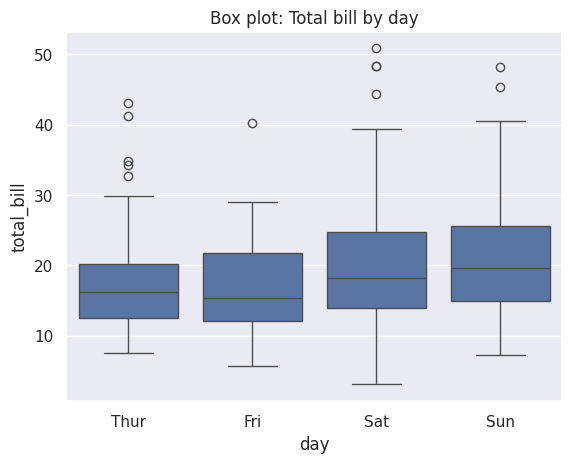

In [ ]:
# Box Plot
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box plot: Total bill by day')
plt.show()

- By examining the box plot, you can identify the central tendency and spread of total bill amounts for each day of the week.
- The length of the box provides insights into the variability of total bill amounts, with longer boxes indicating greater variability.
- The position of the median line within each box helps you compare the typical bill amounts across different days.
- You can see that the median on Saturday and Sunday is significantly higher than on Thursday and Friday.
- The appearance of data points beyond the whiskers indicates the presence of outliers within the dataset.

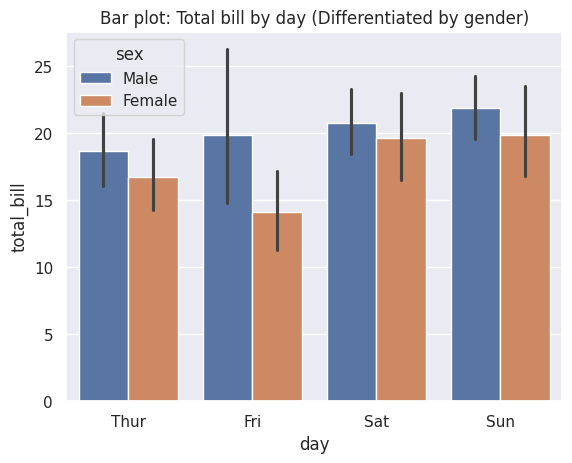

In [ ]:
# Bar Plot
sns.barplot(x='day', y='total_bill', data=tips, hue='sex')
plt.title('Bar plot: Total bill by day (Differentiated by gender)')
plt.show()

- The bar plot facilitates a comparison of average total bill amounts across different days of the week while also considering the gender factor.
- Based on the chart, you can see that there is a disparity in spending patterns between males and females.
- This disparity is even more pronounced on Thursday and Friday as compared to Saturday and Sunday.
- Error bars provide a visual indication of the spread of data points around the mean value for each category in the plot.

## __3. Violin Plot__
A violin plot merges the features of kernel density plots and box plots to show a numerical variable's distribution across categories.




![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/violin_plot.png)

In a violin plot:

- The thick black line in the center represents the median.
- The white dot inside the violin represents the mean.
- The width of the violin at any given point represents the density of the data at that value. Wider sections indicate a higher density of data points.
- The lines extending from the violin, known as whiskers, represent the rest of the distribution outside the interquartile range.
- Any points beyond the whiskers are considered outliers and are plotted individually.

This plot helps you visualize the distribution of total bills for each day, highlighting data point densities and key statistical measures such as the median and interquartile range.

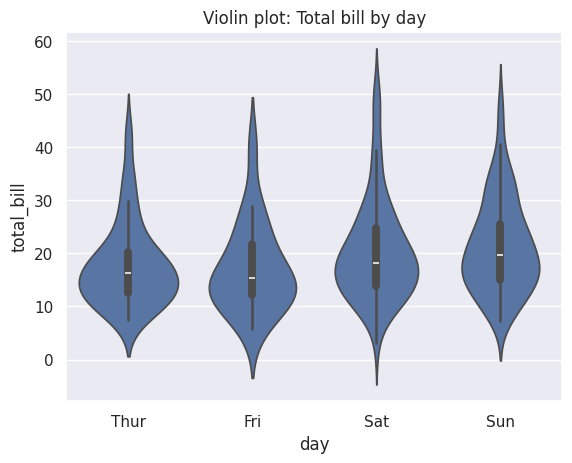

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset('tips')

# Violin Plot
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin plot: Total bill by day')
plt.show()

## __4. Pair Plot:__

A pair plot illustrates the relationships between numerical variables in a dataset using scatter plots, distributions, and color-coded categories.
- It is useful for understanding how different numerical variables relate to each other and how these relationships vary based on a given variable.


This pair plot will help you visualize the relationship across all the variables with respect to the sex column.

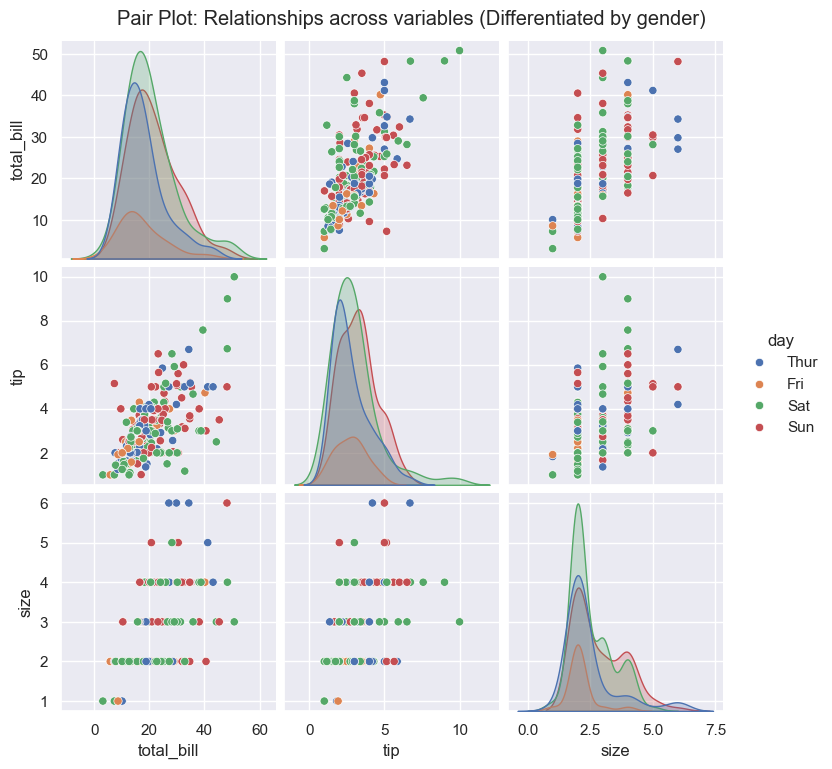

In [17]:
# Pair Plot
sns.pairplot(tips, hue='day')
plt.suptitle('Pair Plot: Relationships across variables (Differentiated by gender)', y=1.02)
plt.show()

- The above plot shows spending behavior by gender.
- The total bill for males is higher than for females.
- Males have paid more tips than females.

## __5. Heatmap:__

A heatmap visualizes the correlation matrix of numerical variables in a dataset, using color gradations to represent the strength and direction of correlations.

- It allows for the quick identification of relationships between variables, with warmer colors indicating stronger correlations and cooler colors indicating weaker or negative correlations.

In [13]:
# Load a sample dataset
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [34]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [36]:
iris.shape

(150, 5)

In [38]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

This map shows the correlation values of different pairs of variables.

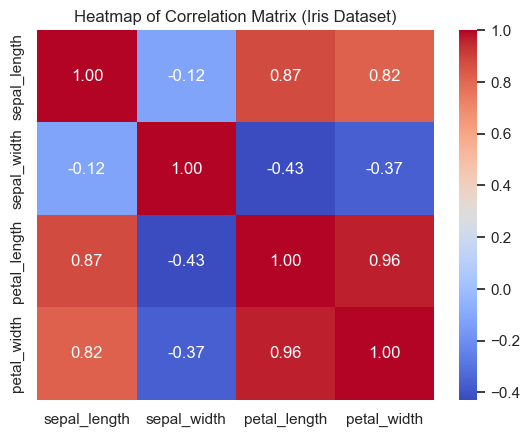

In [23]:


# Calculate correlation matrix for numeric columns only
correlation_matrix = iris.select_dtypes(include='number').corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix (Iris Dataset)')
plt.show()


- The pairs with high correlation values are shown in warmer colors.
- The pairs with low correlation values are shown in cooler colors.

In [45]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

## __6. Joint Plot__

A joint plot reveals the bivariate distribution of two numerical variables using hexagonal bins to represent point density.
- It is a type of plot in data visualization that combines multiple plots to show the relationship between two variables in a dataset.
- It typically includes a scatterplot to visualize the individual data points and additional information such as histograms, kernel density estimates, or regression lines to provide more context about the distribution.


This joint plot helps to identify patterns and concentrations in the relationship between __total_bill__ and __tip__, with darker hexagons indicating a higher point density.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')
diamonds.head()



carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

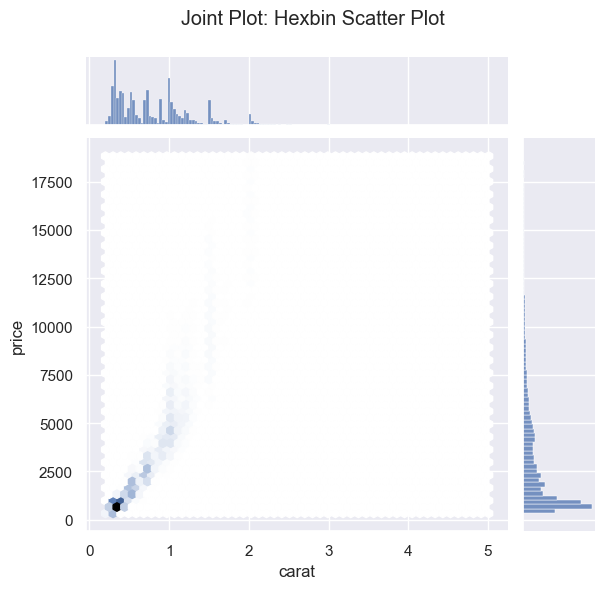

In [27]:
# Create a Joint Plot
joint = sns.jointplot(x='carat', y='price', data=diamonds, kind='hex')

# Adjust the title position
plt.subplots_adjust(top=0.9)

# Set the title for the figure
joint.fig.suptitle('Joint Plot: Hexbin Scatter Plot')

plt.show()


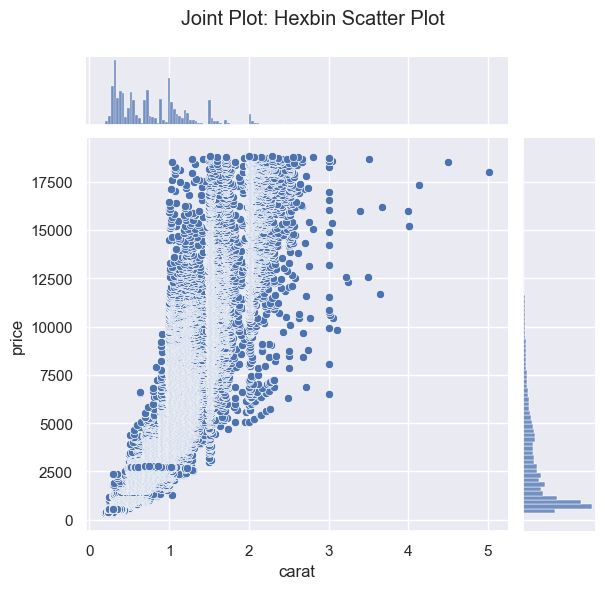

In [29]:
# Create a Joint Plot
joint = sns.jointplot(x='carat', y='price', data=diamonds, kind='scatter')

# Adjust the title position
plt.subplots_adjust(top=0.9)

# Set the title for the figure
joint.fig.suptitle('Joint Plot: Hexbin Scatter Plot')

plt.show()


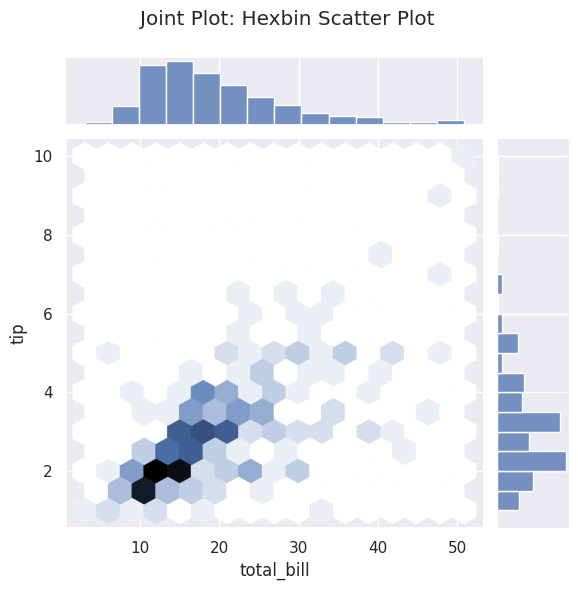

In [ ]:
# Create a Joint Plot
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
# Adjust the title position
plt.subplots_adjust(top=0.9)  # Adjust the top space to make room for the title
# Set the title for the figure
joint.fig.suptitle('Joint Plot: Hexbin Scatter Plot')
plt.show()

- The joint plot shows the relationship between __total_bill__ and __tip__ using hexagonal bins to represent the data density.
- Based on the plot, you can infer that for the total bill, the density of the data is high in the 10 to 20 range.
- You can also infer that for the tips, the density of the data is high in the 1 to 3 range.


## __7. Swarm Plot__

A swarm plot is a categorical scatter plot that arranges individual data points without overlapping.
- It is useful for visualizing the distribution of variables across different days, with each point representing an individual entry.
- It helps identify patterns and concentrations without losing granularity due to point overlap.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


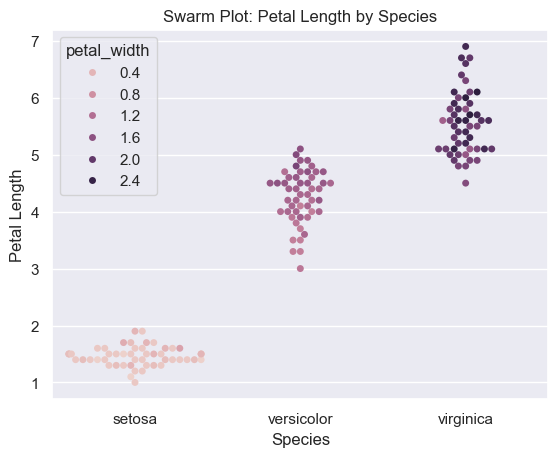

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Create a Swarm Plot
sns.swarmplot(x='species', y='petal_length', data=iris, hue='petal_width')

# Set the title and labels
plt.title('Swarm Plot: Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')

plt.show()


- The swarm plot allows you to visually compare the distribution of petal lengths across different species of iris flowers: Setosa, Versicolor, and Virginica.
- You can observe the range of petal lengths within each species category by examining the spread of points along the y-axis.
- The spread of petal lengths for Setosa falls within the range of 1 to 2. For Versicolor, it falls within the range of 3 to 5. For Virginica, it ranges from 4.5 to 7.








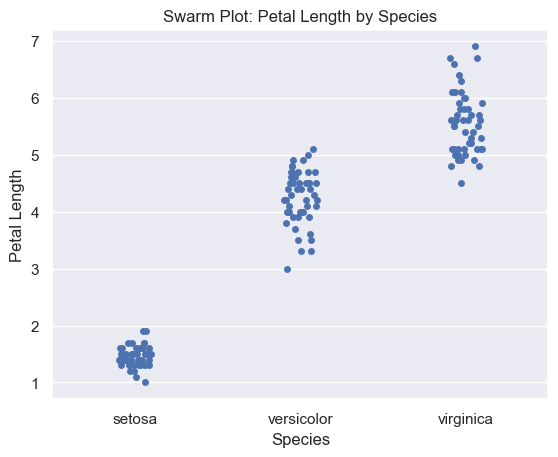

In [33]:
sns.stripplot(x='species', y='petal_length', data=iris)

# Set the title and labels
plt.title('Swarm Plot: Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')

plt.show()


## __8. Plotting 3D Graphs for Multiple Columns Using Seaborn__

- Seaborn's 3D graphs provide insights into relationships among multiple variables, aiding in the discovery of intricate patterns and outliers.

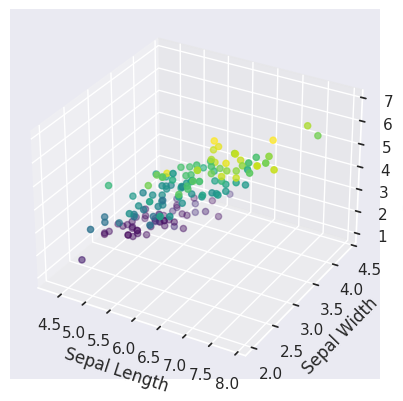

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load an example dataset
iris = sns.load_dataset('iris')

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=iris['petal_width'], cmap='viridis')

# Set labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# Show the plot
plt.show()

- 3D graphs provide additional depth perception, which may aid in understanding complex relationships in three-dimensional space.
- 3D plots can visualize relationships between three variables simultaneously, which might be challenging to represent accurately in a 2D plot.
- Based on this plot, you can see the distribution of data based on sepal length, sepal width, and petal length.



### __Plot a 3D Spiral Graph__

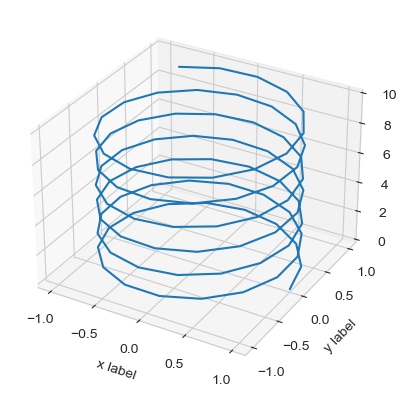

In [42]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate 3D data
z1 = np.linspace(0, 10, 100)
x1 = np.cos(4 * z1)
y1 = np.sin(4 * z1)

# Set Seaborn style to whitegrid
sns.set_style('whitegrid')

# Create a 3D axes
ax = plt.axes(projection='3d')

# Plot the 3D curve
ax.plot3D(x1, y1, z1)

#set the labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')

# Display the 3D plot
plt.show()


- The resulting chart is a 3D plot of a helix that looks like a spring.
- The x and y coordinates trace a circular path in the x-y plane, while the z coordinate increases linearly.

### __Create 3D Surface Using Seaborn__


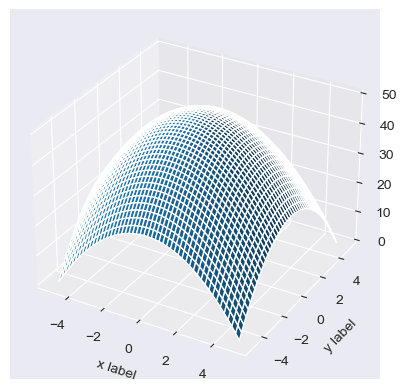

In [44]:
# Define a function to compute z values based on x and y
def return_z(x, y):
    return 50 - (x**2 + y**2)

# Set Seaborn style to whitegrid
sns.set_style('darkgrid')

# Generate 2D grid of x and y values
x1, y1 = np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)
x1, y1 = np.meshgrid(x1, y1)

# Compute z values using the defined function
z1 = return_z(x1, y1)

# Create a 3D axes
ax = plt.axes(projection='3d')

# Plot the 3D surface
ax.plot_surface(x1, y1, z1)

#set the labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')

# Display the 3D plot
plt.show()


- The resulting chart is a 3D surface plot of a paraboloid shape.
- The surface is curved upwards, with the highest point at the center (x=0, y=0) and the height (z value) decreasing as the distance from the center increases.

## __Introduction to Plotly__
Plotly, a Python library for data visualization, supports creating interactive, web-based visualizations.
- It allows users to create a wide range of charts, graphs, and dashboards for exploratory data analysis and presentation purposes.
- It supports both static and dynamic visualizations and is particularly well-suited for creating interactive plots that can be embedded in web applications and notebooks.
- Plotly provides interactive visualizations. This means that you can zoom, pan, hover over data points to see additional information, and toggle specific data series on and off directly in the plot.

Now, let's visualize various plots using Plotly.

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      

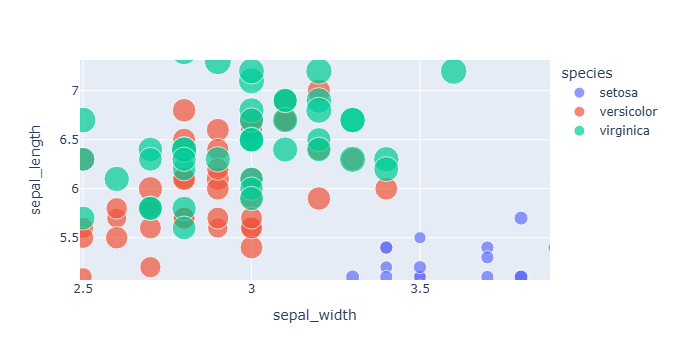

In [39]:
import plotly.express as px

# Create a sample DataFrame
df = px.data.iris()
print(df)

# Create a scatter plot
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="petal_length")

# Show the interactive plot
fig.show()


In this scatterplot made using Plotly, you can hover over individual data points to see their values, zoom in and out, and pan across the plot.

### __Create Box Plot of Petal Length by Species__

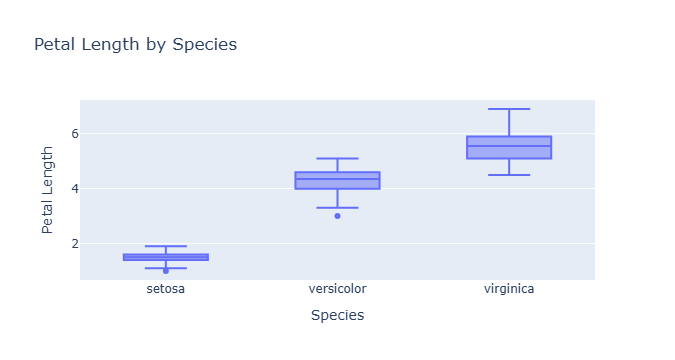

In [41]:
# Create a box plot
fig = px.box(df, x="species", y="petal_length", title="Petal Length by Species",
             labels={'species': 'Species', 'petal_length': 'Petal Length'})

# Show the plot
fig.show()


In this boxplot made using Plotly, you can hover over each boxplot, and the given information will be displayed.

- maximum value
- minimum value
- first quartile (q1)
- third quartile (q3)

You can also zoom in to view individual plots.

### __Create Scatter Matrix of All Features Colored by Species__

- In Plotly, a scatter matrix (also known as a pair plot or a scatterplot matrix) is a plot that allows you to visualize the pairwise relationships between multiple variables in a dataset.
- It is used to quickly identify correlations, patterns, and trends among different variables.
- Each cell in the scatter matrix shows a scatter plot of two variables, with one variable represented on the x-axis and the other on the y-axis.
- The diagonal cells often display histograms or density plots of the individual variables.

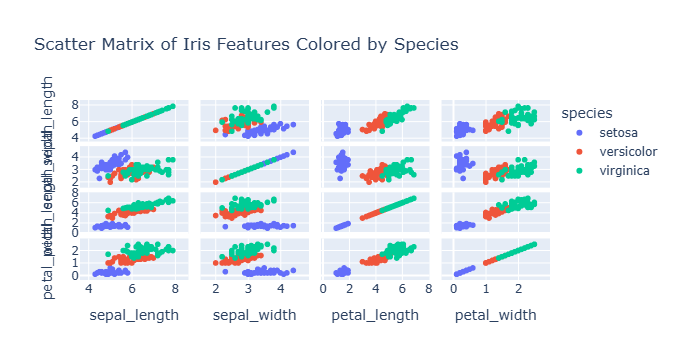

In [43]:
# Create a scatter matrix
fig = px.scatter_matrix(df, dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
                        color="species", title="Scatter Matrix of Iris Features Colored by Species")

# Show the plot
fig.show()


- The scatter matrix visualizes the relationships between the sepal length, sepal width, petal length, and petal width of iris flowers, with different species colored differently.
- This allows for a quick visual assessment of how these variables correlate with each other and how they are distributed across different species.

### __Create a Heatmap to Show Correlation of Features__

- Heatmaps in Plotly are used for visualizing and analyzing data across two dimensions.
- They represent data using a grid of colored squares, where each square corresponds to a specific data point or cell in a dataset.
- The color of each square indicates the value of the data point, allowing for quick and intuitive interpretation of patterns, trends, and variations in the data.

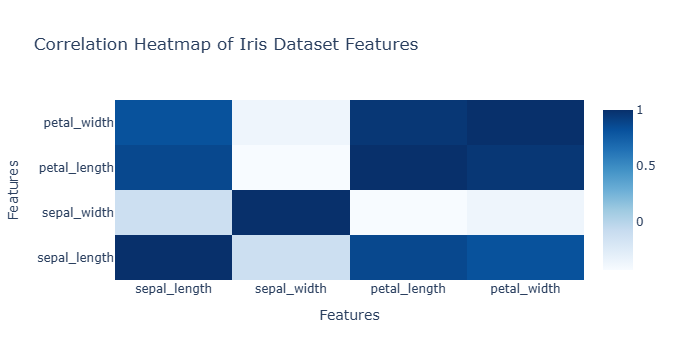

In [61]:
import plotly.graph_objects as go

# Calculate the correlation matrix
correlation_matrix = iris.select_dtypes(include='number').corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Blues'))

fig.update_layout(title='Correlation Heatmap of Iris Dataset Features',
                  xaxis_title='Features',
                  yaxis_title='Features')

# Show the plot
fig.show()

- The heatmap provides a visual representation of the correlation strength between different features (sepal length, sepal width, petal length, and petal width) of the iris dataset.
- There appears to be a negative correlation between sepal width and petal length, as indicated by the lighter shade of the corresponding heatmap cell.
- You can observe a strong positive correlation between petal length and petal width, as indicated by the darker shade of the corresponding heatmap cell.

Plotly is a data visualization library that allows users to create interactive and visually appealing charts, graphs, and dashboards. It provides a flexible and powerful platform for visualizing data in various formats, enabling users to explore, analyze, and communicate insights effectively.

# __Assisted Practice__

## __Problem Statement:__
Analyze the housing dataset using various types of plots from the Seaborn and Plotly libraries to gain insights into the data.

## __Steps to Perform:__
Step 1: Create a violin plot for a feature like SalePrice to visualize its distribution and understand its characteristics.


Step 2: Use a pair plot to visualize the relationships between different numerical variables like LotArea, YearBuilt, and SalePrice.


Step 3: Create a heatmap of the correlation matrix to understand the relationships between different numerical features.


Step 4: Use a joint plot to visualize the relation between two numerical variables and their individual distributions, for example, LotArea and SalePrice.


Step 5: Create a swarm plot for a categorical variable like Neighborhood against SalePrice to understand the distribution of prices in each neighborhood.